In [2]:
!pip install pm4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.9 MB/s eta 0:00:00


In [18]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset pulito
df = pd.read_csv('27_11_Filtered_Log.csv')

df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
df['start_timestamp'] = pd.to_datetime(df['start_timestamp']) # Convert start_timestamp to datetime
df['case:concept:name'] = df['case:concept:name'].astype(str)
df['concept:name'] = df['concept:name'].astype(str)

print("number of cases:", len(df['case:concept:name'].unique()))
df.head()

number of cases: 436


,case:concept:name,Idade,Sexo,Nível de Urgência,CID,Médico Responsável,Doença,Data Inicial,time:timestamp,concept:name,...,Convênio,outlier_label,start_timestamp,Elapsed_Time_Mins,Elapsed_Time_Days,Processing_Time,processing_time,lead_time,@@index,@@case_index
0,5446538,31,F,Não informado,J111,Médico 72,J11.1 Influenza c/out manif resp dev virus n i...,21/07/2020 10:22,2020-07-21 10:22:00,Atendimento,...,Convênio 9,outlier,2020-07-21 10:22:00,0.0,0.000000,0.0,0.0,545.0,0,0
1,5446538,31,F,Não informado,J111,Médico 72,J11.1 Influenza c/out manif resp dev virus n i...,21/07/2020 10:45,2020-07-21 10:49:00,Triagem,...,Convênio 9,outlier,2020-07-21 10:22:00,27.0,0.018750,27.0,27.0,545.0,1,0
2,5446538,31,F,Não informado,J111,Médico 72,J11.1 Influenza c/out manif resp dev virus n i...,21/07/2020 11:01,2020-07-21 11:01:00,Exames Laboratoriais,...,Convênio 9,outlier,2020-07-21 10:22:00,39.0,0.027083,12.0,12.0,545.0,2,0
3,5446538,31,F,Não informado,J111,Médico 72,J11.1 Influenza c/out manif resp dev virus n i...,21/07/2020 11:32,2020-07-21 11:32:00,Consulta,...,Convênio 9,outlier,2020-07-21 10:22:00,70.0,0.048611,31.0,31.0,545.0,3,0
4,5446538,31,F,Não informado,J111,Médico 72,J11.1 Influenza c/out manif resp dev virus n i...,21/07/2020 19:27,2020-07-21 19:27:00,Alta,...,Convênio 9,outlier,2020-07-21 10:22:00,545.0,0.378472,475.0,475.0,545.0,4,0


totale varianti: 104
Top 10 Varianti più frequenti:
                                             Variant  Count  Percentage
0             (Atendimento, Triagem, Consulta, Alta)    247   56.651376
1  (Atendimento, Triagem, Consulta, Exames de Ima...     49   11.238532
2  (Atendimento, Triagem, Consulta, Exames Labora...     12    2.752294
3  (Atendimento, Triagem, Consulta, Exames Labora...      8    1.834862
4  (Atendimento, Triagem, Consulta, Exames Labora...      4    0.917431
5  (Atendimento, Triagem, Consulta, Materiais Hos...      4    0.917431
6  (Atendimento, Consulta, Exames Laboratoriais, ...      3    0.688073
7  (Atendimento, Triagem, Consulta, Medicamentos,...      3    0.688073
8                      (Atendimento, Consulta, Alta)      3    0.688073
9             (Atendimento, Consulta, Triagem, Alta)      2    0.458716


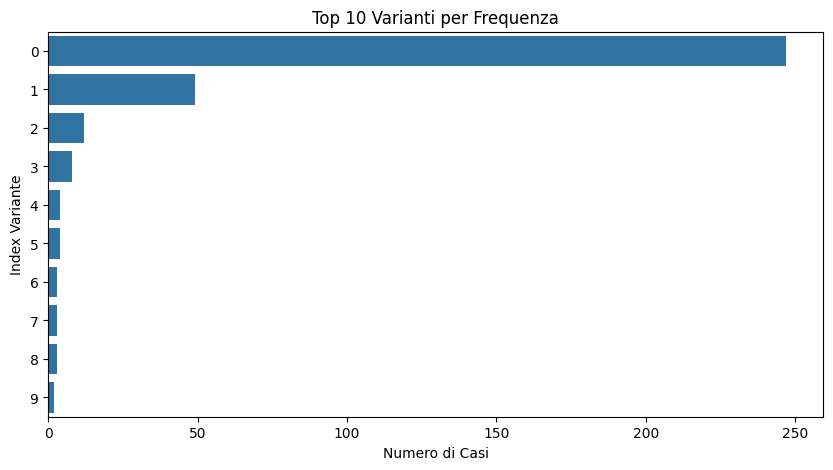

In [11]:
# prendo le varianti
variants = pm4py.get_variants_as_tuples(df)

# Conto frequenze
variants_list = []
for var, cases in variants.items():
    variants_list.append({'Variant': var, 'Count': cases})

df_variants = pd.DataFrame(variants_list).sort_values(by='Count', ascending=False).reset_index(drop=True)

# Calcolo la copertura percentuale
df_variants['Percentage'] = (df_variants['Count'] / df_variants['Count'].sum()) * 100

print(f"totale varianti: {len(df_variants)}")
print("Top 10 Varianti più frequenti:")
print(df_variants.head(10))

# Grafico delle Top 10 Varianti
plt.figure(figsize=(10, 5))
sns.barplot(data=df_variants.head(10), x='Count', y=df_variants.head(10).index, orient='h')
plt.title('Top 10 Varianti per Frequenza')
plt.xlabel('Numero di Casi')
plt.ylabel('Index Variante')
plt.show()

In [12]:
# Vediamo quali sono i CID più frequenti
print(df['CID'].value_counts().head())

# Creiamo due segmenti basati sui due CID più frequenti
cid1 = 'J111'
cid2 = 'N23'

seg_1 = df[df['CID'] == cid1]
seg_2 = df[df['CID'] == cid2]

print(f"Casi nel segmento {cid1}: {len(seg_1['case:concept:name'].unique())}")
print(f"Casi nel segmento {cid2}: {len(seg_2['case:concept:name'].unique())}")

CID
J111    1768
N23      727
R074     373
R073      29
J129      28
Name: count, dtype: int64
Casi nel segmento J111: 349
Casi nel segmento N23: 47


/tmp/ipython-input-978265651.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([durations_1, durations_2], labels=[f'CID: {cid1}', f'CID: {cid2}'])


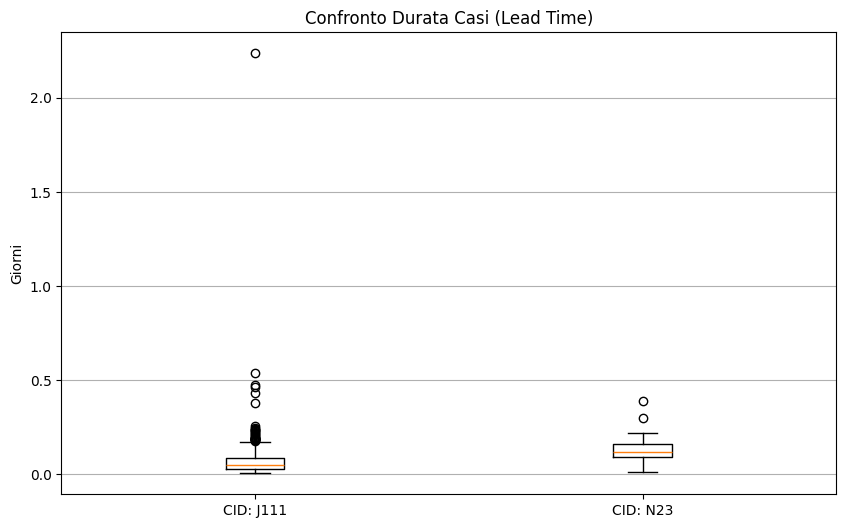

Media durata J111: 0.08 giorni
Media durata N23: 0.13 giorni


In [14]:

#Lead Time
def calculate_lead_time(dataframe):
    case_durations = pm4py.get_all_case_durations(dataframe)
    # in giorni
    return [d / (24 * 3600) for d in case_durations]

durations_1 = calculate_lead_time(seg_1)
durations_2 = calculate_lead_time(seg_2)

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.boxplot([durations_1, durations_2], labels=[f'CID: {cid1}', f'CID: {cid2}'])
plt.title('Confronto Durata Casi (Lead Time)')
plt.ylabel('Giorni')
plt.grid(True, axis='y')
plt.show()

print(f"Media durata {cid1}: {sum(durations_1)/len(durations_1):.2f} giorni")
print(f"Media durata {cid2}: {sum(durations_2)/len(durations_2):.2f} giorni")

Generazione DFG - Frequenza...


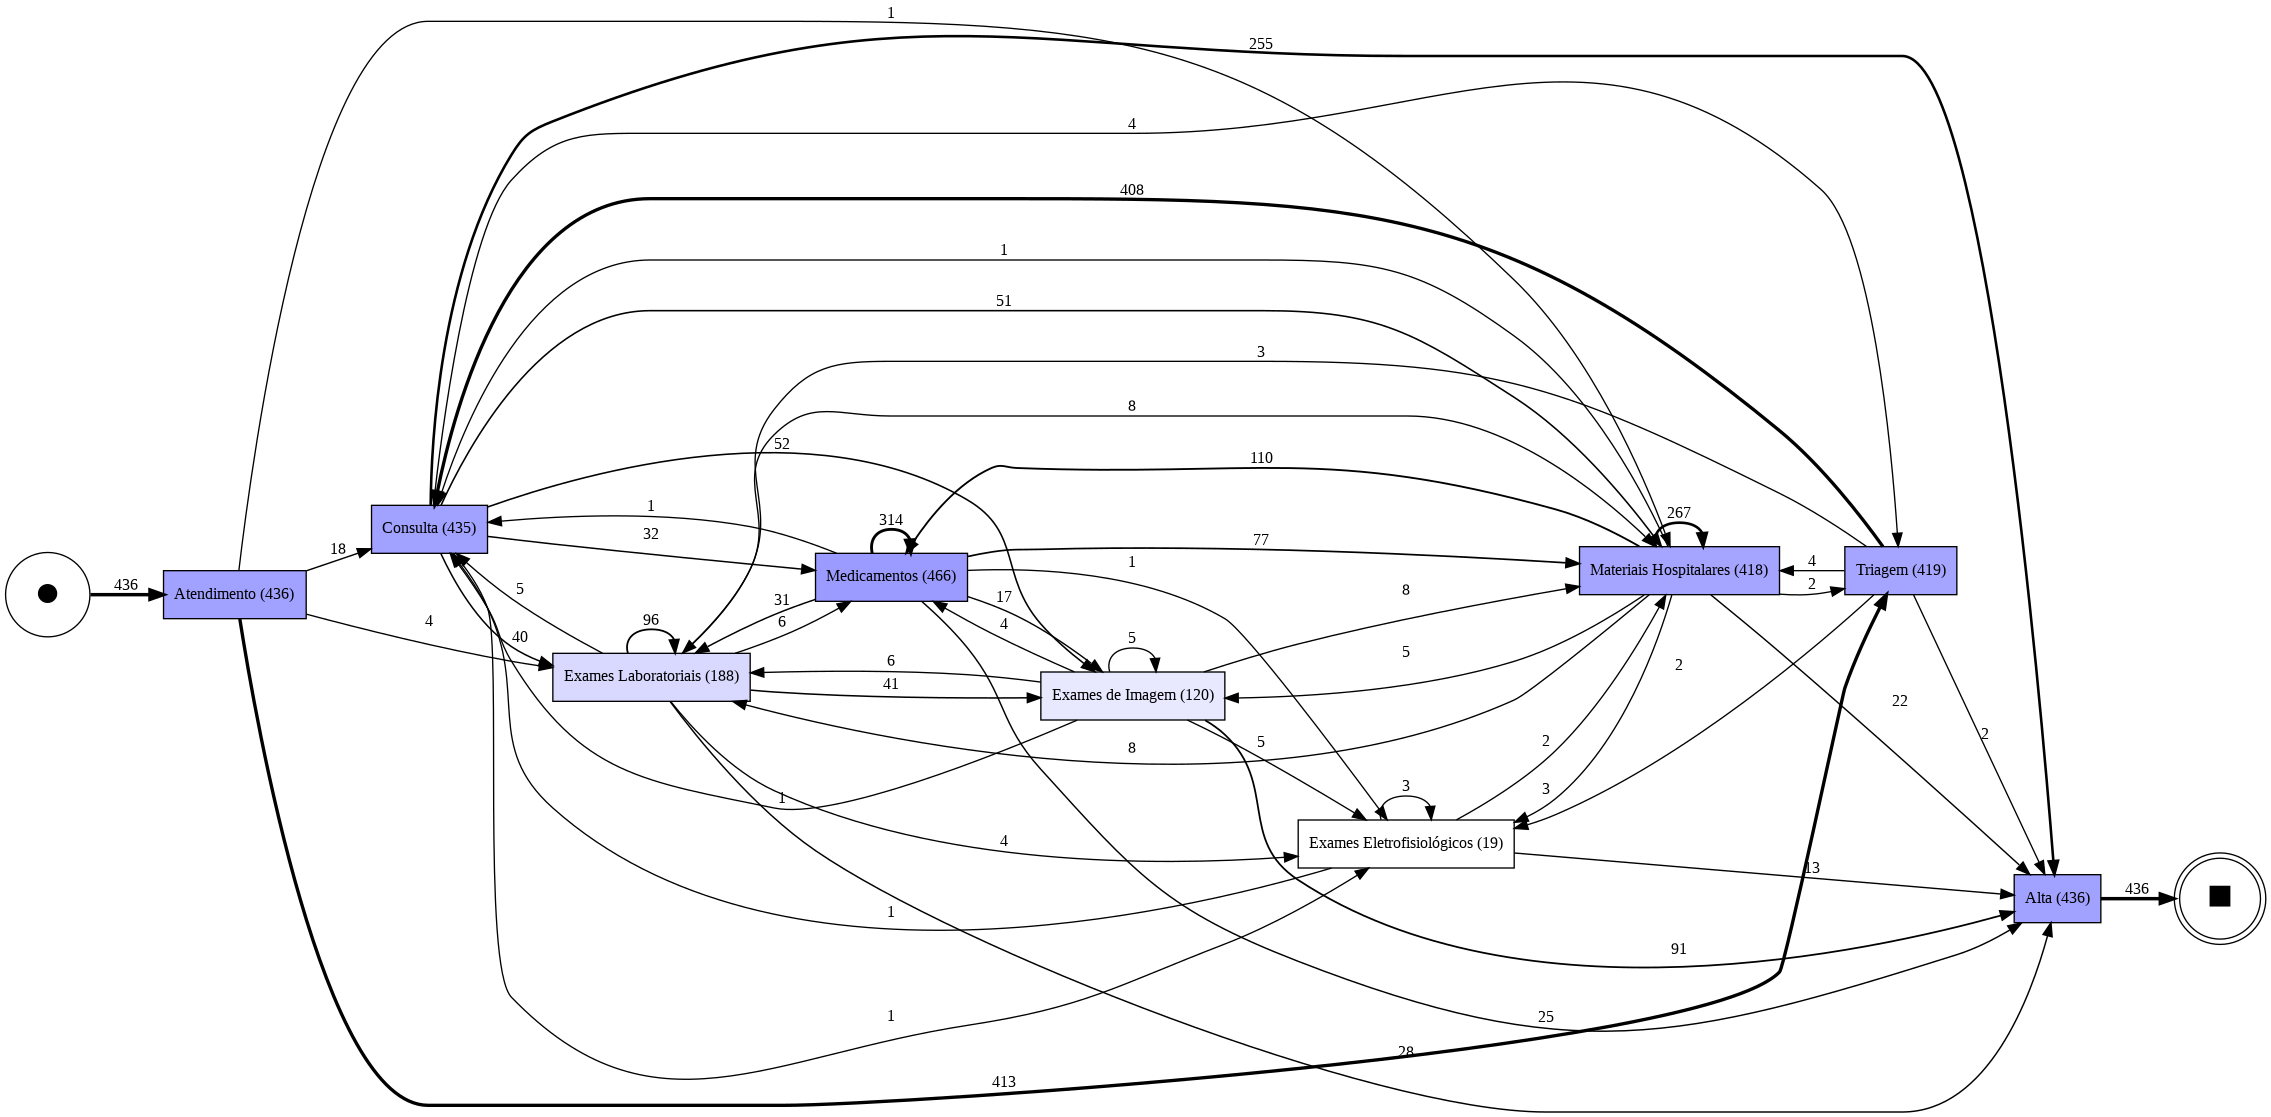


Generazione DFG - Performance (Tempo Medio)...


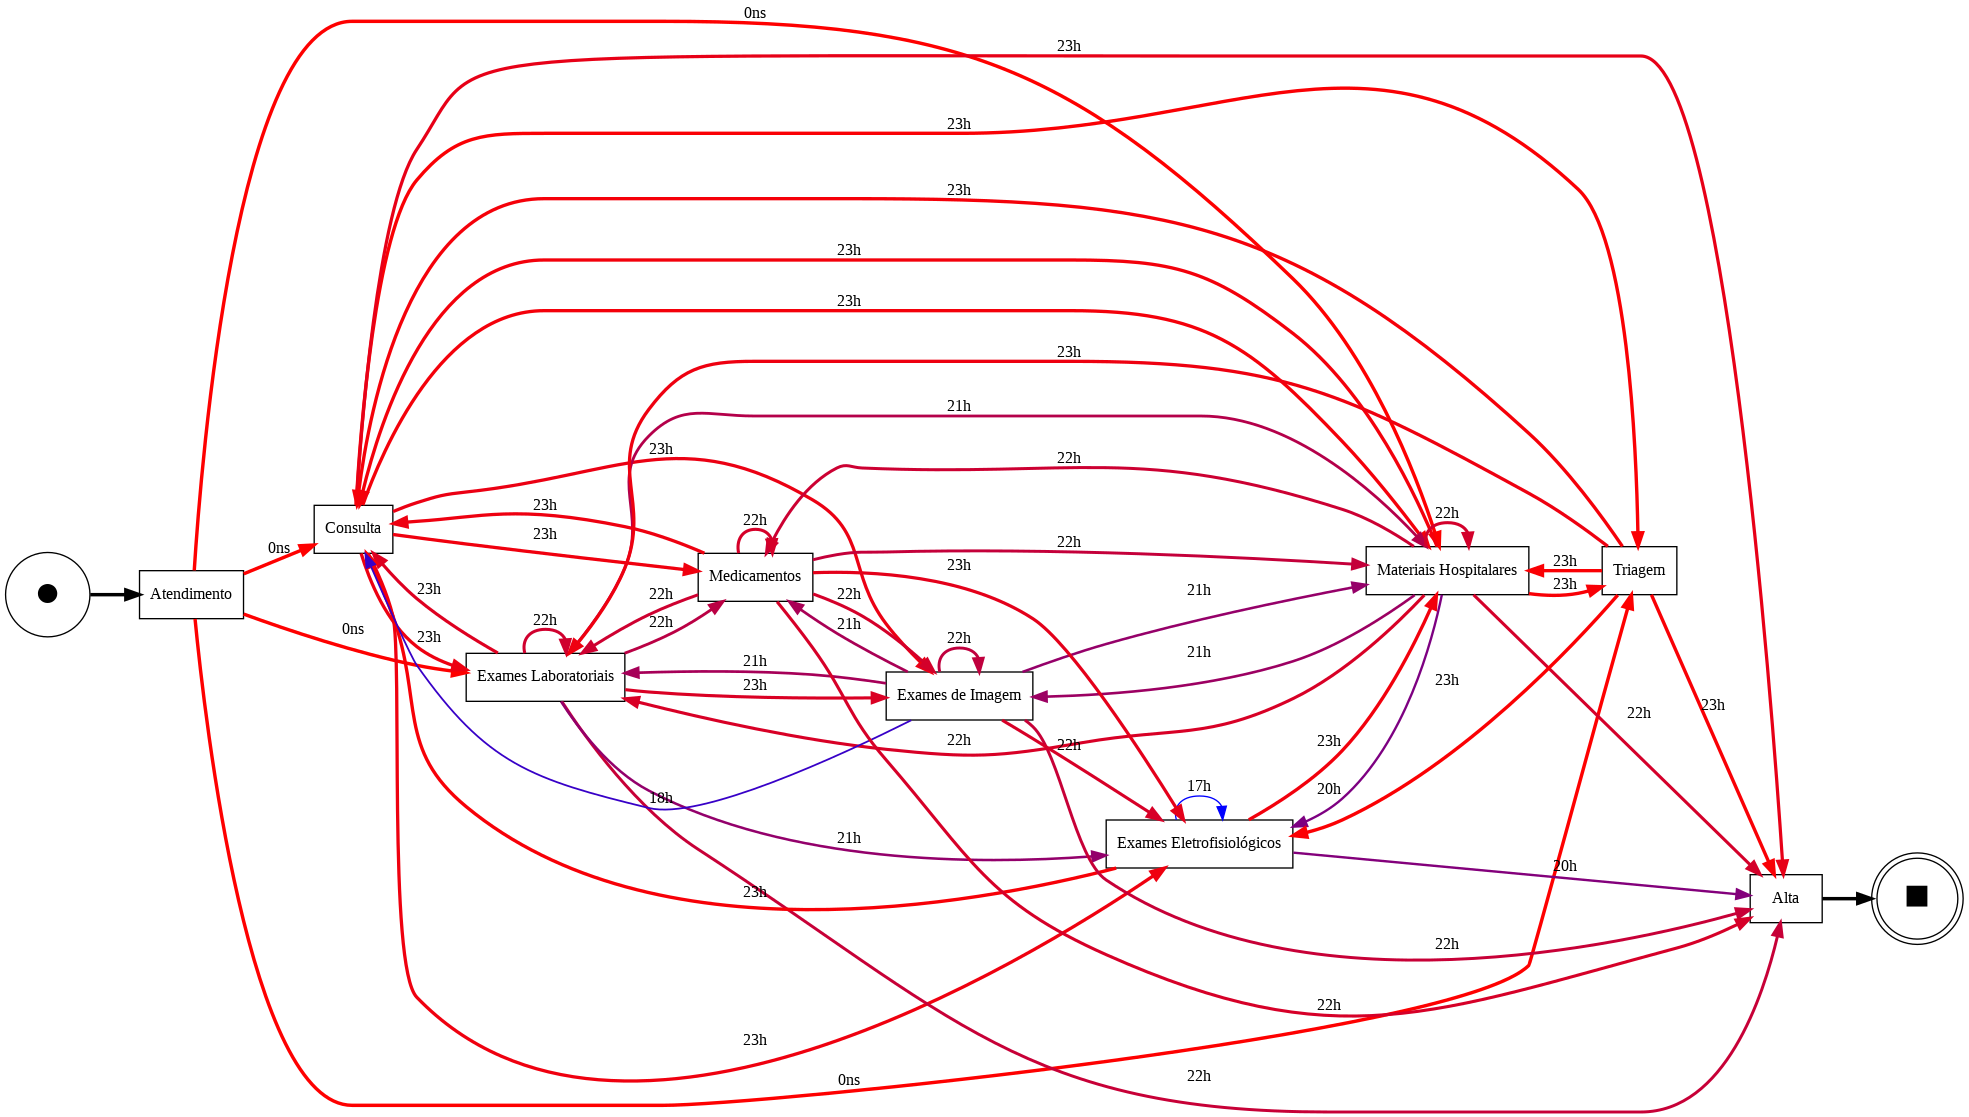


Generazione Petri Net (Inductive Miner)...


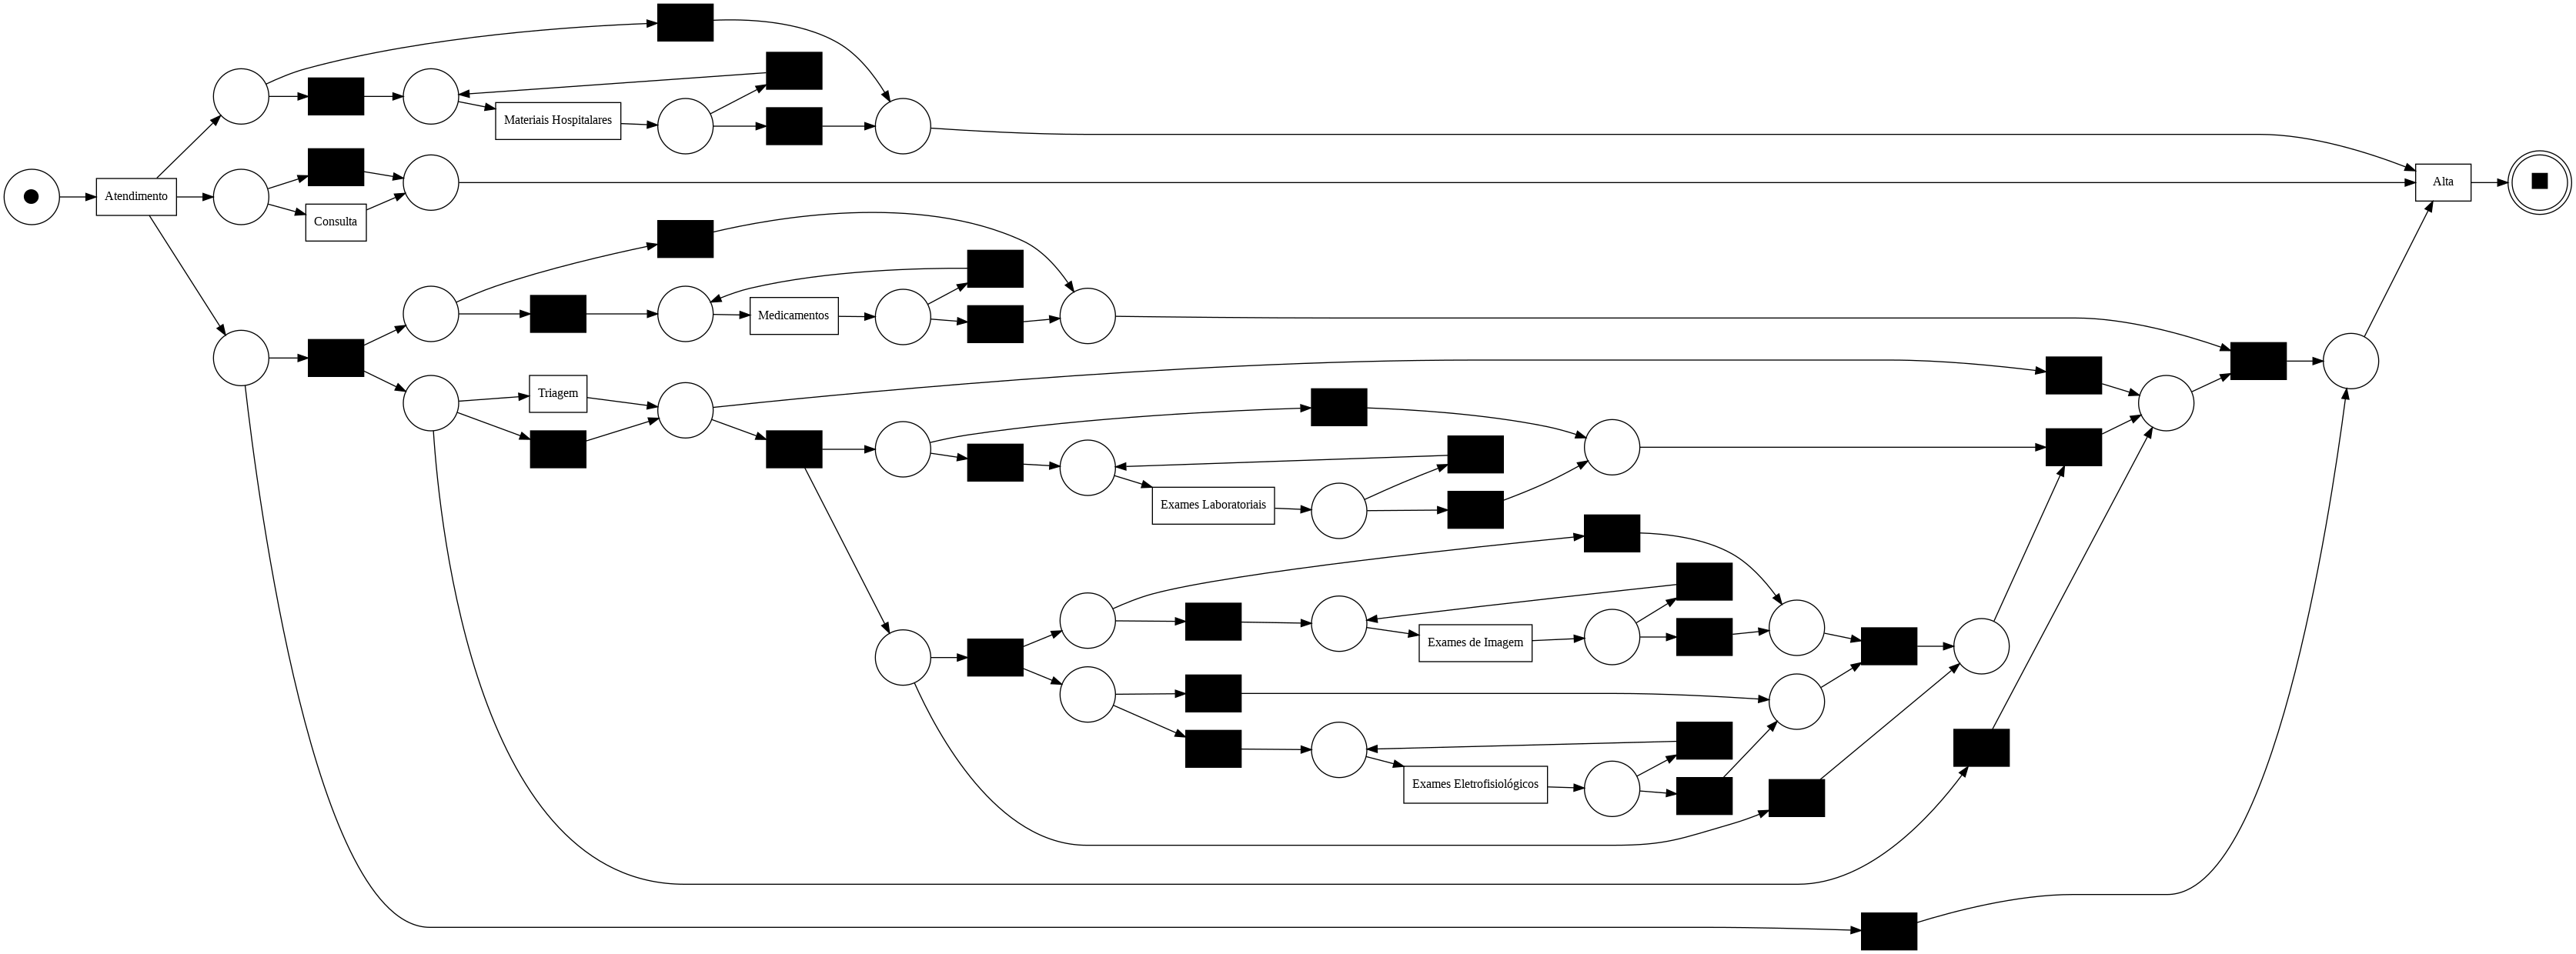

In [20]:
import pm4py

# DIRECTLY FOLLOWS GRAPH (FREQUENZA)
print("Generazione DFG - Frequenza...")
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)


# DIRECTLY FOLLOWS GRAPH (PERFORMANCE/TEMPO)
print("\nGenerazione DFG - Performance (Tempo Medio)...")
performance_dfg = pm4py.discover_performance_dfg(df)
pm4py.view_performance_dfg(performance_dfg[0], start_activities, end_activities)


# PETRI NET (Inductive Miner)
print("\nGenerazione Petri Net (Inductive Miner)...")
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net, initial_marking, final_marking)